Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

In [47]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

Age Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
578   60   Male              0.5               0.1                   500   
579   40   Male              0.6               0.1                    98   
580   52   Male              0.8               0.2                   245   
581   31   Male              1.3               0.5                   184   
582   38   Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
578      1.6                        0.37        2  
579      3.2                        1.10        1  
580      3.2                        1.00        1  
581      3.4                        1.00        1  
582      4.4                        1.50        2

In [3]:
len(data[data['Dataset']==2])

167

In [4]:
len(data[data['Dataset']==1])

416

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin.

In [122]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(data['Direct_Bilirubin'], data['Total_Bilirubin'])
print('Коэффициент корреляции Пирсона =',  np.round_(corr, decimals=3))
print('Вероятность независимости двух величин =', np.round_(p_value, decimals=8))

Коэффициент корреляции Пирсона = 0.875
Вероятность независимости двух величин = 0.0


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [134]:
Direct_Bilirubin = np.array(data['Direct_Bilirubin']).reshape(-1,1)
Total_Bilirubin = np.array(data['Total_Bilirubin']).reshape(-1,1)

In [135]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Direct_Bilirubin, Total_Bilirubin, test_size = 0.2)

In [136]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression() 
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
print(round(regression.score(x_test, y_test) * 100), '% точности на тестовых данных')

98.0 % точности на тестовых данных


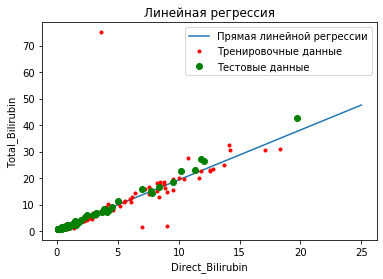

In [138]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(0, 25, 25)
y = regression.coef_*x + regression.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(x_train, y_train, 'r.')
plt.plot(x_test, y_test, 'go')
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Пример, как считать квантили:

In [139]:
age = data['Age']

In [140]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [141]:
data.quantile([.10, .25, .50, .75], axis = 0) 

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0.10  23.0              0.7               0.1                 150.0   
0.25  33.0              0.8               0.2                 175.5   
0.50  45.0              1.0               0.3                 208.0   
0.75  58.0              2.6               1.3                 298.0   

      Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0.10                      18.0                        19.0             5.1   
0.25                      23.0                        25.0             5.8   
0.50                      35.0                        42.0             6.6   
0.75                      60.5                        87.0             7.2   

      Albumin  Albumin_and_Globulin_Ratio  Dataset  
0.10      2.0                       0.546      1.0  
0.25      2.6                       0.700      1.0  
0.50      3.1                       0.930      1.0  
0.75      3.8                       1.100      2.0

Пример квартилей:

In [142]:
data.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529        1.085451   
min                   10.000000                   10.000000        2.700000   
25%                   23.000000                   25.000000        5.800000   
50%                   35.000000                   42.000000        6.600000   
75%                   60.500000                   87.000000        7.200000   
max                 2000.000000                 4929.000000        9.600000   

          Albumin  Albumin_and_Globulin_Ratio     Dataset  
count  583.000000                  579.000000  583.000000  
mean     3.141852                    0.947064    1.286449  
std      0.795519                    0.319592    0.452490  
min      0.900000                    0.300000    1.000000  
25%      2.600000                    0.700000    1.000000  
50%      3.100000                    0.930000    1.000000  
75%      3.800000                    1.100000    2.000000  
max      5.500000                    2.800000    2.000000

Посчитать квартили для всех **колонок**. 

In [143]:
data.quantile([.25, .50, .75], axis = 0) 

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0.25  33.0              0.8               0.2                 175.5   
0.50  45.0              1.0               0.3                 208.0   
0.75  58.0              2.6               1.3                 298.0   

      Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0.25                      23.0                        25.0             5.8   
0.50                      35.0                        42.0             6.6   
0.75                      60.5                        87.0             7.2   

      Albumin  Albumin_and_Globulin_Ratio  Dataset  
0.25      2.6                        0.70      1.0  
0.50      3.1                        0.93      1.0  
0.75      3.8                        1.10      2.0

Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [144]:
Direct_Bilirubin_younger_50 = data[data['Age'] < 50]['Direct_Bilirubin']
Direct_Bilirubin_elder_50 = data[data['Age'] >= 50]['Direct_Bilirubin']

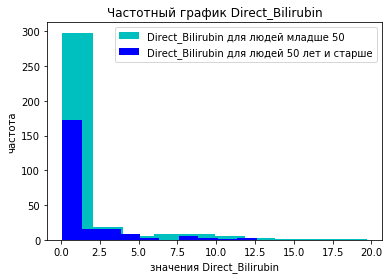

In [145]:
plt.hist(Direct_Bilirubin_younger_50, 10, facecolor='c')
plt.hist(Direct_Bilirubin_elder_50, 10, facecolor='b')
plt.xlabel('значения Direct_Bilirubin')
plt.ylabel('частота')
plt.title('Частотный график Direct_Bilirubin')
plt.legend(['Direct_Bilirubin для людей младше 50', 'Direct_Bilirubin для людей 50 лет и старше',])
plt.show()

In [146]:
import statistics
mean_younger_50 = statistics.mean(Direct_Bilirubin_younger_50)
quantile_younger_50 = Direct_Bilirubin_younger_50.quantile(0.5)
mean_elder_50 = statistics.mean(Direct_Bilirubin_elder_50)
quantile_elder_50 = Direct_Bilirubin_elder_50.quantile(0.5)
print('Для людей младше 50 лет:', 'среднее значение =', round(mean_younger_50, 3), 'квантиль 0.5 =', quantile_younger_50)
print('Для людей 50 лет и старше:', 'среднее значение =', round(mean_elder_50, 3), 'квантиль 0.5 =', quantile_elder_50)

Для людей младше 50 лет: среднее значение = 1.495 квантиль 0.5 = 0.3
Для людей 50 лет и старше: среднее значение = 1.473 квантиль 0.5 = 0.4


Среднее значение прямого билирубина и середина значений показателя прямого билирубина для людей 50 лет и старше несколько ниже, чем для людей младше 50 лет 

In [147]:
Total_Bilirubin_ill = data[data['Dataset'] == 1]['Total_Bilirubin']
print('количество больных людей:', len(Total_Bilirubin_ill)) 
stats.ttest_1samp(Total_Bilirubin_ill, data['Total_Bilirubin'].mean())

количество больных людей: 416


Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

выборка (общий билирубин больных людей) не похожа на генеральную совокупность (общий билирубин всех людей), так как полученное значение вероятности pvalue=0.01387, говорит о том что с вероятностью 1.4% среднее значение выбоки будет равно среднему значению генеральной совокупности и эта полученная вероятность слишком маленькая (<0.05 или <5%)

Полученное значение t-критерия = 2.471. Для степеней свободы = 415 и доверительной вероятности 0.95 табличное значение t-критерия = число между 1.96 и 1.98. Полученное значение t-критерия больше табличного значения --> не принимаем гипотезу о равестве средних выборки (общий билирубин больных людей) и генеральной совокупности (общий билирубин всех людей)   

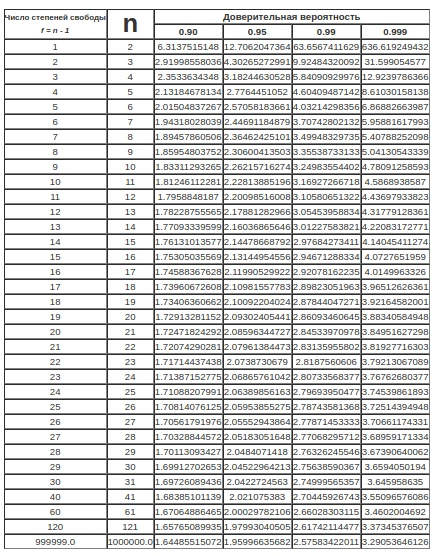

In [55]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть?

In [148]:
Total_Bilirubin_healthy = data[data['Dataset'] == 2]['Total_Bilirubin']
t_value, p_value =stats.ttest_ind(Total_Bilirubin_ill, Total_Bilirubin_healthy)
print('значение t =', round(t_value, 3))
print('значение стандартной ошибки =', round(p_value, 8))

значение t = 5.441
значение стандартной ошибки = 8e-08


Так как полученное значение стандартной ошибки очень маленькое и меньше заданного уровня 0.05, то гипотеза о равенстве средних двух выборок (общий билирубин больных и здоровых людей) не принимается --> выборки не имеют схожести

Посчитать статистическую значимость для **трех** выборок (по возрасту) -**тест Anova** - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [150]:
under_30 = data[(data['Age'] >= 1) & (data['Age'] < 30)]['Dataset']
between_30_55 = data[(data['Age'] >= 30) & (data['Age'] <= 55)]['Dataset']
elder_55 = data[data['Age'] > 55]['Dataset']
statistic_value, p1_value = stats.f_oneway(under_30, between_30_55, elder_55)
print('значение статистики =', round(statistic_value, 3))
print('значение стандартной ошибки =', round(p1_value, 4))

значение статистики = 9.442
значение стандартной ошибки = 0.0001


Так как полученное значение стандартной ошибки маленькое и меньше заданного уровня 0.05, то гипотеза о равенстве средних 3-х выборок (болен или не болен человек в зависимости от возраста) не принимается --> выборки будут отличаться

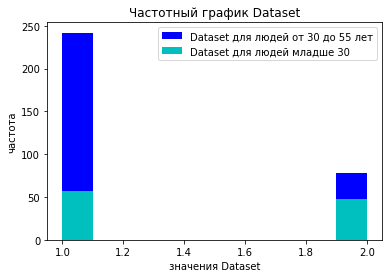

In [151]:
# визуализируем наши выборки
plt.hist(between_30_55, 10, facecolor='b')
plt.hist(under_30, 10, facecolor='c')
plt.xlabel('значения Dataset')
plt.ylabel('частота')
plt.title('Частотный график Dataset')
plt.legend(['Dataset для людей от 30 до 55 лет', 'Dataset для людей младше 30'])
plt.show()

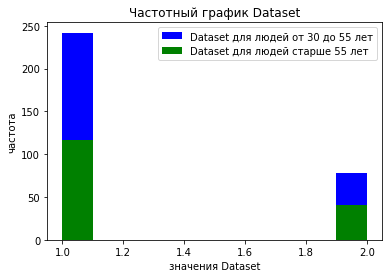

In [152]:
plt.hist(between_30_55, 10, facecolor='b')
plt.hist(elder_55, 10, facecolor='g')
plt.xlabel('значения Dataset')
plt.ylabel('частота')
plt.title('Частотный график Dataset')
plt.legend(['Dataset для людей от 30 до 55 лет', 'Dataset для людей старше 55 лет'])
plt.show()

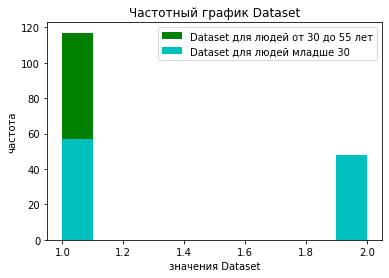

In [153]:
plt.hist(elder_55, 10, facecolor='g')
plt.hist(under_30, 10, facecolor='c')
plt.xlabel('значения Dataset')
plt.ylabel('частота')
plt.title('Частотный график Dataset')
plt.legend(['Dataset для людей от 30 до 55 лет', 'Dataset для людей младше 30'])
plt.show()

In [118]:
print('% больных в возрасте меньше 30 лет =', round(len(under_30[under_30 == 1])/len(under_30)*100, 1))
print('% больных в возрасте от 30 до 55 лет =', round(len(between_30_55[between_30_55 == 1])/len(between_30_55)*100, 1))
print('% больных в возрасте старше 55 лет =', round(len(elder_55[elder_55 == 1])/len(elder_55)*100, 1))

% больных в возрасте меньше 30 лет = 54.3
% больных в возрасте от 30 до 55 лет = 75.6
% больных в возрасте старше 55 лет = 74.1


In [121]:
print('среднее значение выбоки по возрасту меньше 30 лет =', round(under_30.mean(), 2))
print('среднее значение выбоки по возрасту от 30 до 55 лет =', round(between_30_55.mean(), 2))
print('среднее значение выбоки по возрасту старше 55 лет =', round(elder_55.mean(), 2))

среднее значение выбоки по возрасту меньше 30 лет = 1.46
среднее значение выбоки по возрасту от 30 до 55 лет = 1.24
среднее значение выбоки по возрасту сташе 55 лет = 1.26


Из построенных визуализаций, расчитанных процентов больных людей в разрезе выборок, расчитанных средних значений в разрезе выборок видно, что выборака возраста младше 30 лет значительно отличается от выборок по возрастам: от 30 до 55 лет и старше 55 лет.